# Lending club case study

## Importing data

### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('C:\\Users\\nithi\\OneDrive\\Desktop\\PGP\\Lending_Club_CaseStudy\\loan.csv',error_bad_lines=False, index_col=False, dtype='unicode')

In [3]:
df.shape

(39717, 111)

#### Checking for Null Values Column Wise

In [4]:
#making a dataframe with missing value percentage as one column and the columns of df in another column
missing_values_percentage = df.isnull().sum()/len(df)*100
missing_values_dataframe = pd.DataFrame({'Columns' : df.columns,'Percentage_missing_values' : missing_values_percentage})
missing_values_dataframe.sort_values(by = 'Percentage_missing_values',ascending = False).head()

,Columns,Percentage_missing_values
verification_status_joint,verification_status_joint,100.0
annual_inc_joint,annual_inc_joint,100.0
mo_sin_old_rev_tl_op,mo_sin_old_rev_tl_op,100.0
mo_sin_old_il_acct,mo_sin_old_il_acct,100.0
bc_util,bc_util,100.0


In [5]:
# Copying all the columns which have 100% missing values into a list.
Complete_null_columns = list(missing_values_dataframe[missing_values_dataframe['Percentage_missing_values'] == 100.0]['Columns'])
print('Total Number of Columns which has 100% Null Values: ',len(Complete_null_columns))

Total Number of Columns which has 100% Null Values:  54


#### Removing all the columns which has 100% null values and copying remaining all columns in another data frame df1.

In [6]:
#new data frame is take as the intention is keep the original data frame as it is. And we use new df for our analysis.
df1 = df.drop(columns = Complete_null_columns, axis = 1)
df1

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0,1,INDIVIDUAL,0,0,0,0,0
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0,1,INDIVIDUAL,0,0,0,0,0
2,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0,1,INDIVIDUAL,0,0,0,0,0
3,1076863,1277178,10000,10000,10000,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0,1,INDIVIDUAL,0,0,0,0,0
4,1075358,1311748,3000,3000,3000,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0,1,INDIVIDUAL,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075,36 months,8.07%,78.42,A,A4,...,NaN,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875,36 months,10.28%,275.38,C,C1,...,NaN,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325,36 months,8.07%,156.84,A,A4,...,NaN,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650,36 months,7.43%,155.38,A,A2,...,NaN,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


#### Checking for null value percentage in the remaining Columns

In [7]:
#making a new dataframe of percentage null values in each of the remaining colomns
percentage_null_values_in_df = df1.isnull().sum()/len(df)*100
percentage_null_values_in_df_data = pd.DataFrame({'Columns' : df1.columns, 'Percentage_null_values' : percentage_null_values_in_df })
percentage_null_values_in_df_data.sort_values(by = 'Percentage_null_values',ascending = False)

,Columns,Percentage_null_values
next_pymnt_d,next_pymnt_d,97.129693
mths_since_last_record,mths_since_last_record,92.985372
mths_since_last_delinq,mths_since_last_delinq,64.662487
desc,desc,32.580507
emp_title,emp_title,6.191303
emp_length,emp_length,2.706650
pub_rec_bankruptcies,pub_rec_bankruptcies,1.754916
last_pymnt_d,last_pymnt_d,0.178765
chargeoff_within_12_mths,chargeoff_within_12_mths,0.140998
collections_12_mths_ex_med,collections_12_mths_ex_med,0.140998


#### Removing the columns with null value percentage greater than 60% and also removing the Description column (The loan description )which is summerized by the purpose (purpose of taking loan).

In [8]:
#copying the column names whose null value percentage is greater than 30% as desc is breifed by the purpose column.
percent_null_list = list(percentage_null_values_in_df_data[percentage_null_values_in_df_data['Percentage_null_values']>30]['Columns'])
percent_null_list

['desc', 'mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d']

#### Dropping all the columns which are copied in the list percent_null_list

In [9]:
df1 = df1.drop(columns = percent_null_list,axis = 1)
df1

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0,1,INDIVIDUAL,0,0,0,0,0
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0,1,INDIVIDUAL,0,0,0,0,0
2,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0,1,INDIVIDUAL,0,0,0,0,0
3,1076863,1277178,10000,10000,10000,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0,1,INDIVIDUAL,0,0,0,0,0
4,1075358,1311748,3000,3000,3000,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0,1,INDIVIDUAL,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075,36 months,8.07%,78.42,A,A4,...,80.9,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875,36 months,10.28%,275.38,C,C1,...,281.94,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325,36 months,8.07%,156.84,A,A4,...,0,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650,36 months,7.43%,155.38,A,A2,...,0,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


#### Noticed few columns where all the values in that particular column are same. Checking for those columns

In [10]:
#Checking the columns which has all the values same and adding those to the list same_values_in_column_check
def same_column_check(df1):
    same_values_in_column_check = []
    for col in df1.columns:
        uniq = df1[col].unique()
        if(len(uniq) == 1):
            same_values_in_column_check.append(col)
    return same_values_in_column_check
constant_values = same_column_check(df1)

#### The Columns which has all the values same, can be removed as they dont provide any insights to our analysis

In [11]:
df1 = df1.drop(columns = constant_values,axis = 1)
df1

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,...,0,0,0,Jan-15,171.62,May-16,0,0,0,0
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,...,0,117.08,1.11,Apr-13,119.66,Sep-13,0,0,0,0
2,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,...,0,0,0,Jun-14,649.91,May-16,0,0,0,0
3,1076863,1277178,10000,10000,10000,36 months,13.49%,339.31,C,C1,...,16.97,0,0,Jan-15,357.48,Apr-16,0,0,0,0
4,1075358,1311748,3000,3000,3000,60 months,12.69%,67.79,B,B5,...,0,0,0,May-16,67.79,May-16,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075,36 months,8.07%,78.42,A,A4,...,0,0,0,Jul-10,80.9,Jun-10,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875,36 months,10.28%,275.38,C,C1,...,0,0,0,Jul-10,281.94,Jul-10,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325,36 months,8.07%,156.84,A,A4,...,0,0,0,Apr-08,0,Jun-07,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650,36 months,7.43%,155.38,A,A2,...,0,0,0,Jan-08,0,Jun-07,NaN,NaN,NaN,NaN


#### Considering Id, member Id are not significant to our analysis, hence removing those as well.

In [12]:
df1 = df1.drop(columns = ['id','member_id'],axis = 1)
df1

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens
0,5000,5000,4975,36 months,10.65%,162.87,B,B2,NaN,10+ years,...,0,0,0,Jan-15,171.62,May-16,0,0,0,0
1,2500,2500,2500,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,...,0,117.08,1.11,Apr-13,119.66,Sep-13,0,0,0,0
2,2400,2400,2400,36 months,15.96%,84.33,C,C5,NaN,10+ years,...,0,0,0,Jun-14,649.91,May-16,0,0,0,0
3,10000,10000,10000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,16.97,0,0,Jan-15,357.48,Apr-16,0,0,0,0
4,3000,3000,3000,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,...,0,0,0,May-16,67.79,May-16,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,2500,1075,36 months,8.07%,78.42,A,A4,FiSite Research,4 years,...,0,0,0,Jul-10,80.9,Jun-10,NaN,NaN,NaN,NaN
39713,8500,8500,875,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,...,0,0,0,Jul-10,281.94,Jul-10,NaN,NaN,NaN,NaN
39714,5000,5000,1325,36 months,8.07%,156.84,A,A4,NaN,< 1 year,...,0,0,0,Apr-08,0,Jun-07,NaN,NaN,NaN,NaN
39715,5000,5000,650,36 months,7.43%,155.38,A,A2,NaN,< 1 year,...,0,0,0,Jan-08,0,Jun-07,NaN,NaN,NaN,NaN


#### Checking 'collections_12_mths_ex_med' , 'chargeoff_within_12_mths','tax_liens' as only 0s and nans are visible

In [13]:
df1['collections_12_mths_ex_med'].unique()

array(['0', nan], dtype=object)

In [14]:
df1['chargeoff_within_12_mths'].unique()

array(['0', nan], dtype=object)

In [15]:
df1['tax_liens'].unique()

array(['0', nan], dtype=object)

#### Dropping the collections_12_mths_ex_med column as it only has either 0 or nan values

In [16]:
df1 = df1.drop(columns = ['collections_12_mths_ex_med','chargeoff_within_12_mths','tax_liens'],axis = 1)
df1

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975,36 months,10.65%,162.87,B,B2,NaN,10+ years,...,5833.84,5000,863.16,0,0,0,Jan-15,171.62,May-16,0
1,2500,2500,2500,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,...,1008.71,456.46,435.17,0,117.08,1.11,Apr-13,119.66,Sep-13,0
2,2400,2400,2400,36 months,15.96%,84.33,C,C5,NaN,10+ years,...,3005.67,2400,605.67,0,0,0,Jun-14,649.91,May-16,0
3,10000,10000,10000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,12231.89,10000,2214.92,16.97,0,0,Jan-15,357.48,Apr-16,0
4,3000,3000,3000,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,...,3513.33,2475.94,1037.39,0,0,0,May-16,67.79,May-16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,2500,1075,36 months,8.07%,78.42,A,A4,FiSite Research,4 years,...,1213.88,2500,322.97,0,0,0,Jul-10,80.9,Jun-10,NaN
39713,8500,8500,875,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,...,1020.51,8500,1413.49,0,0,0,Jul-10,281.94,Jul-10,NaN
39714,5000,5000,1325,36 months,8.07%,156.84,A,A4,NaN,< 1 year,...,1397.12,5000,272.16,0,0,0,Apr-08,0,Jun-07,NaN
39715,5000,5000,650,36 months,7.43%,155.38,A,A2,NaN,< 1 year,...,672.66,5000,174.2,0,0,0,Jan-08,0,Jun-07,NaN


In [17]:
df1.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'url', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')

### By looking at the data few columns needs to be removed which might not help to analyse if the person is defaulter or not based on our understanding which are summerized below.

emp_title(Job title of the borrower): This is a categorical variable and contains large number of value counts which might not help to say a particular borrower with particular emp_title might be a defaulter. We cannot use this as a categorical column

url: It is a categorical column contains the Lending club urls of particular borrower, which will not be of any help to identify if the person is a defaulter or not as it contains loan id in it and which might not help to say if a particular borrower is a defaulter or not.

title(The reason behind the requested amount by the borrower): This column is summarized by the purpose(The summerized reason behind the requested amount by the borrower) column which is useful, So title column is chosen to be removed.

zip_code(First three numbers of zip code provided by the loan applicant): There are many value_counts in zip_code, we cannot use it as categorical variable or the continuous variable, instead we can categorize the data based on the states. Hence it is chosen to be removed.

earliest_cr_line: The month the borrower's earliest reported credit line was opened, could not be of any help to understand if the person is a defaulter or not. It is impossible to say if the borrower's credit line was opened in particular month or year then the borrower might be a defaulter

last_pymnt_d: Last month payment was received will not interpret any insights if the borrower is a defaulter or not.

last_credit_pull_d: The most recent month LC pulled credit for that particular loan, does not give any clue if the borrower is a defaulter or not.

In [18]:
df1 = df1.drop(columns = ['emp_title','url','title','zip_code','earliest_cr_line','last_pymnt_d','last_credit_pull_d'])
df1

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
0,5000,5000,4975,36 months,10.65%,162.87,B,B2,10+ years,RENT,...,0,5863.155187,5833.84,5000,863.16,0,0,0,171.62,0
1,2500,2500,2500,60 months,15.27%,59.83,C,C4,< 1 year,RENT,...,0,1008.71,1008.71,456.46,435.17,0,117.08,1.11,119.66,0
2,2400,2400,2400,36 months,15.96%,84.33,C,C5,10+ years,RENT,...,0,3005.666844,3005.67,2400,605.67,0,0,0,649.91,0
3,10000,10000,10000,36 months,13.49%,339.31,C,C1,10+ years,RENT,...,0,12231.89,12231.89,10000,2214.92,16.97,0,0,357.48,0
4,3000,3000,3000,60 months,12.69%,67.79,B,B5,1 year,RENT,...,524.06,3513.33,3513.33,2475.94,1037.39,0,0,0,67.79,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,2500,1075,36 months,8.07%,78.42,A,A4,4 years,MORTGAGE,...,0,2822.969293,1213.88,2500,322.97,0,0,0,80.9,NaN
39713,8500,8500,875,36 months,10.28%,275.38,C,C1,3 years,RENT,...,0,9913.491822,1020.51,8500,1413.49,0,0,0,281.94,NaN
39714,5000,5000,1325,36 months,8.07%,156.84,A,A4,< 1 year,MORTGAGE,...,0,5272.161128,1397.12,5000,272.16,0,0,0,0,NaN
39715,5000,5000,650,36 months,7.43%,155.38,A,A2,< 1 year,MORTGAGE,...,0,5174.198551,672.66,5000,174.2,0,0,0,0,NaN


### Deriving new Columns from the available data

int_rate(Rate of interest at which the borrower has taken the loan) and revol_util(The amount of credit the borrower is using to the available revolving credit): Removing the percentage symbol at the end and converting it to continuous variable

issue_d(The Year in which the loan was funded was taken out from the date column): removing the month and converting the column to years which can be converted into category of years to understand if percentage of defaulters increase or decrease as the year progresses.

In [19]:
#Converting the int_rate, revol_util, issue_d into their respective convinient form
df1['int_rate'] = df['int_rate'].str.rstrip('%')
df1['revol_util'] = df['revol_util'].str.rstrip('%')
df1['issue_d'] = df1['issue_d'].apply(lambda x: '20'+x[-2:])

#### Checking the loan_status(Current status of the loan) column which has the information about defaulters and non defaulters

In [20]:
df1['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

#### Removing the rows which are Current which does not give any insight on if the borrower is a defaulter or not as the borrower is currently repaying the amount.

In [21]:
#removing current loan status as it is not required for our analysis
df1 = df1[~ (df1['loan_status'] == 'Current')]
df1

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
0,5000,5000,4975,36 months,10.65,162.87,B,B2,10+ years,RENT,...,0,5863.155187,5833.84,5000,863.16,0,0,0,171.62,0
1,2500,2500,2500,60 months,15.27,59.83,C,C4,< 1 year,RENT,...,0,1008.71,1008.71,456.46,435.17,0,117.08,1.11,119.66,0
2,2400,2400,2400,36 months,15.96,84.33,C,C5,10+ years,RENT,...,0,3005.666844,3005.67,2400,605.67,0,0,0,649.91,0
3,10000,10000,10000,36 months,13.49,339.31,C,C1,10+ years,RENT,...,0,12231.89,12231.89,10000,2214.92,16.97,0,0,357.48,0
5,5000,5000,5000,36 months,7.90,156.46,A,A4,3 years,RENT,...,0,5632.21,5632.21,5000,632.21,0,0,0,161.03,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,2500,1075,36 months,8.07,78.42,A,A4,4 years,MORTGAGE,...,0,2822.969293,1213.88,2500,322.97,0,0,0,80.9,NaN
39713,8500,8500,875,36 months,10.28,275.38,C,C1,3 years,RENT,...,0,9913.491822,1020.51,8500,1413.49,0,0,0,281.94,NaN
39714,5000,5000,1325,36 months,8.07,156.84,A,A4,< 1 year,MORTGAGE,...,0,5272.161128,1397.12,5000,272.16,0,0,0,0,NaN
39715,5000,5000,650,36 months,7.43,155.38,A,A2,< 1 year,MORTGAGE,...,0,5174.198551,672.66,5000,174.2,0,0,0,0,NaN


### Checking for columns which has all the values same again as we removed few rows from the data

In [22]:
list_of_consant_columns = same_column_check(df1)

In [23]:
df1 = df1.drop(columns = list_of_consant_columns)
df1

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
0,5000,5000,4975,36 months,10.65,162.87,B,B2,10+ years,RENT,...,9,5863.155187,5833.84,5000,863.16,0,0,0,171.62,0
1,2500,2500,2500,60 months,15.27,59.83,C,C4,< 1 year,RENT,...,4,1008.71,1008.71,456.46,435.17,0,117.08,1.11,119.66,0
2,2400,2400,2400,36 months,15.96,84.33,C,C5,10+ years,RENT,...,10,3005.666844,3005.67,2400,605.67,0,0,0,649.91,0
3,10000,10000,10000,36 months,13.49,339.31,C,C1,10+ years,RENT,...,37,12231.89,12231.89,10000,2214.92,16.97,0,0,357.48,0
5,5000,5000,5000,36 months,7.90,156.46,A,A4,3 years,RENT,...,12,5632.21,5632.21,5000,632.21,0,0,0,161.03,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,2500,1075,36 months,8.07,78.42,A,A4,4 years,MORTGAGE,...,40,2822.969293,1213.88,2500,322.97,0,0,0,80.9,NaN
39713,8500,8500,875,36 months,10.28,275.38,C,C1,3 years,RENT,...,9,9913.491822,1020.51,8500,1413.49,0,0,0,281.94,NaN
39714,5000,5000,1325,36 months,8.07,156.84,A,A4,< 1 year,MORTGAGE,...,20,5272.161128,1397.12,5000,272.16,0,0,0,0,NaN
39715,5000,5000,650,36 months,7.43,155.38,A,A2,< 1 year,MORTGAGE,...,26,5174.198551,672.66,5000,174.2,0,0,0,0,NaN


#### Checking for Null values in the columns

In [24]:
df1.isnull().sum().sort_values(ascending = False).head()

emp_length                 1033
pub_rec_bankruptcies        697
revol_util                   50
last_pymnt_amnt               0
collection_recovery_fee       0
dtype: int64

#### Identifying which of the columns are of numerical datatype and which are of String from the above columns

In [25]:
# copying all the columns which are of numeric datatype and converting them to float data type
num_columns = ['loan_amnt', 'funded_amnt','funded_amnt_inv', 'installment', 'annual_inc', 'dti','delinq_2yrs','inq_last_6mths','open_acc',
          'revol_bal', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
          'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
          'revol_util','int_rate','pub_rec','total_acc','last_pymnt_amnt','pub_rec_bankruptcies']
df1[num_columns] = df1[num_columns].astype(np.float)

#### Handling emp_length column, checking if the emp_length can some how influence the annual_inc

In [26]:
#checking the mean of the annual income for each emp_length by doing a groupby operation
df1.groupby('emp_length')['annual_inc'].mean()

emp_length
1 year       62437.770148
10+ years    81567.829166
2 years      63097.114847
3 years      66694.122363
4 years      66615.882687
5 years      68022.083303
6 years      68014.232874
7 years      69211.802291
8 years      74425.050132
9 years      74503.624584
< 1 year     60640.949106
Name: annual_inc, dtype: float64

#### From the above values of the means,to input the null values into the emp_length(Borrower work experience) column, our approach is that if the annual_inc(Annual Income of the borrower)  <= 60000 then emp_length is assumed as < 1 year and if the value of annual_inc >= 80000 then emp_length is assumed as 10+ years

In [27]:
# setting the emp_length with values <1 year and 10+ years in respective rows.
df1.loc[((df1['emp_length']).isnull())& (df1['annual_inc'] <= 60000),['emp_length']] = '< 1 year'
df1.loc[((df1['emp_length']).isnull())& (df1['annual_inc'] >= 80000),['emp_length']] = '10+ years'

#### Checking the rest of the peoples annual incomes whose emp_length(Borrowers work experience) is null

In [28]:
print('The mean of the annual incomes of the people whose emp_length is null is:',df1[df1['emp_length'].isnull()]['annual_inc'].mean())

The mean of the annual incomes of the people whose emp_length is null is: 68081.05644859813


#### From the above value which is 68081.05, we assumed that it is nearer to the mean of the people who has emp_length as 5 years, So imputing the value of 5 years in the rest of the null values in emp_length column

In [29]:
# setting the emp_length with value 5 years in null rows.
df1.loc[((df1['emp_length']).isnull()),['emp_length']] = '5 years'

In [30]:
#checking for the null values again
df1.isnull().sum().sort_values(ascending = False).head(3)

pub_rec_bankruptcies    697
revol_util               50
delinq_2yrs               0
dtype: int64

#### Analysing pub_rec_bankruptcies(Number of public record bankruptcies)

In [31]:
#checking value counts
df1['pub_rec_bankruptcies'].value_counts()

0.0    36238
1.0     1637
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

In [32]:
# most of the values are zeros, so we will check if grade will influence the pub_rec_bankruptcies
100*df1[df1['pub_rec_bankruptcies'] == 1]['grade'].value_counts()/df1['grade'].value_counts()

A    1.274266
B    4.488223
C    5.859076
D    5.604720
E    5.970710
F    6.557377
G    6.020067
Name: grade, dtype: float64

#### As observed from the above the percentage of A getting pub_rec_bankruptcies is 1.27 and rest others are far more than 1, hence we assumed that if grade = A then pub_rec_bankruptcy = 0 else it is 1 as the values of pub_rec_bankruptcies = 2 are very less we cannot conclude from that, hence we decided to replace null values with 1 or 0 based on grade

In [33]:
# setting the pub_rec_bankruptcies with 0 in null rows.
df1.loc[((df1['pub_rec_bankruptcies']).isnull())& (df1['grade'] == 'A'),['pub_rec_bankruptcies']] = 0

In [34]:
#setting rest of the values as 1 in remaining null rows
df1.loc[((df1['pub_rec_bankruptcies']).isnull()),['pub_rec_bankruptcies']] = 1

In [35]:
#checking for null columns
df1.isnull().sum().sort_values(ascending = False).head(2)

revol_util    50
loan_amnt      0
dtype: int64

#### Analyzing the revol_util( Amount of credit the borrower is using relative to all available revolving credit) column

In [36]:
# converting the revol_util column values to float data type.
df1['revol_util'] = df1['revol_util'].astype('float')

In [37]:
# checking for trends if revil_util and grade are correlated by checking the mean of revol_util for each grade 
df1.groupby('grade')['revol_util'].mean()

grade
A    29.854575
B    46.611531
C    56.682676
D    62.973780
E    67.749261
F    69.945567
G    75.248485
Name: revol_util, dtype: float64

#### Observed that the revol_util is increasing from A to G, So the assumption is fill the null values with the mean of their respective grades

In [38]:
# Copying all the values in the dictionary
new_dict = round(df1.groupby('grade')['revol_util'].mean(),2).to_dict()

In [39]:
new_dict

{'A': 29.85,
 'B': 46.61,
 'C': 56.68,
 'D': 62.97,
 'E': 67.75,
 'F': 69.95,
 'G': 75.25}

In [40]:
# Assigning the values to the revol_util column with respect to keys from new_dict
for key,value in new_dict.items():
    df1.loc[((df1['revol_util']).isnull())& (df1['grade'] == key),['revol_util']] = round(value,2)

In [41]:
df1.isnull().sum().sort_values(ascending = False).head(1)

loan_amnt    0
dtype: int64

Null values are dealt with proper explaination. Hence proceeding with the analysis.

In [42]:
#checking for percentage defaulters present in the available data.
loan_status_value_counts = df1['loan_status'].value_counts()
print('Percentage of defaulters : ',100*loan_status_value_counts[1]/(loan_status_value_counts[0]+loan_status_value_counts[1]))

Percentage of defaulters :  14.586411592399616


## Univariate Analysis

#### Analysing the boxplots of the numerical columns and their data.

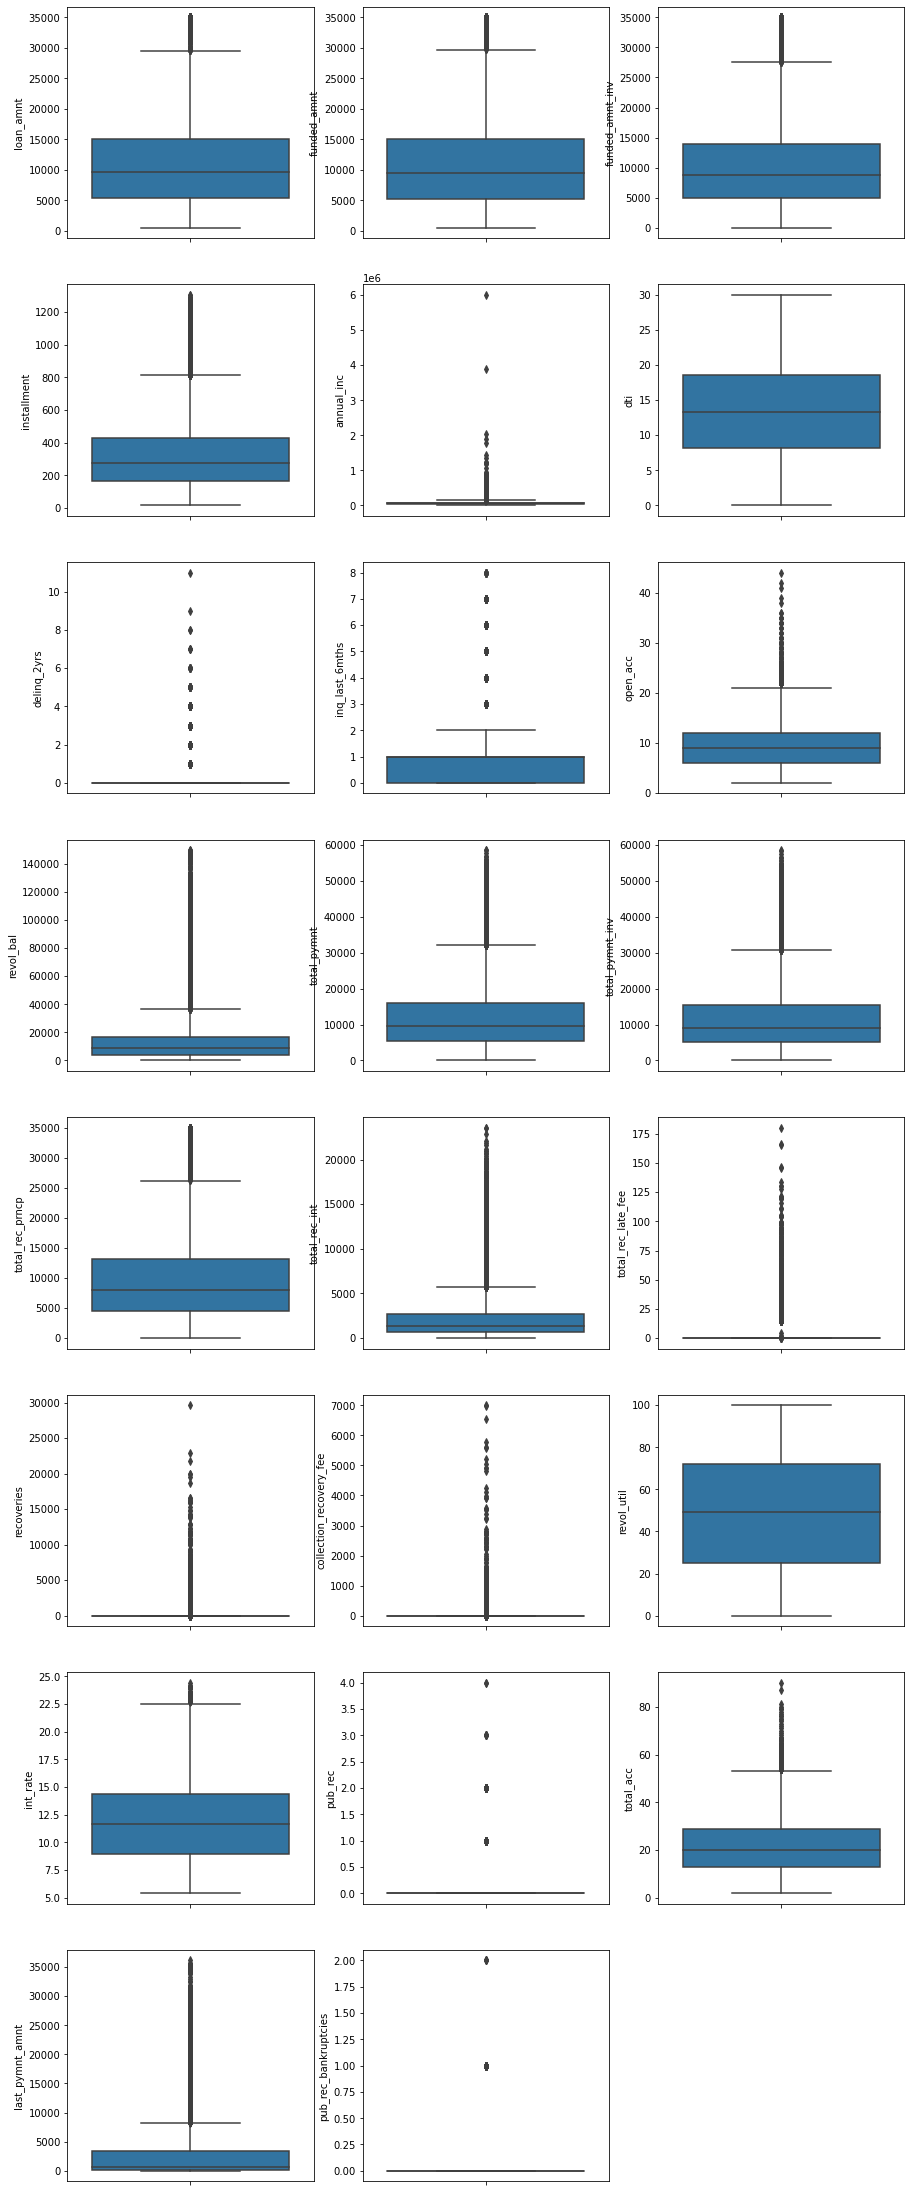

In [43]:
#box plots for all the numeric columns
plt.figure(figsize=(15,40))
for i in range(len(num_columns)):
    plt.subplot(8,3, i + 1)
    sns.boxplot(y=df1[num_columns[i]], data=df1)
plt.show()

#### Observing the delinq_2yrs(The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years), inq_last_6mths(Number of enquires in past 6 months), pub_rec(Number of derogatory public records), pub_rec_bankruptcies(Number of public record bankruptcies)

In [44]:
df1['delinq_2yrs'].value_counts()

0.0     34386
1.0      3207
2.0       673
3.0       212
4.0        60
5.0        21
6.0        10
7.0         4
8.0         2
9.0         1
11.0        1
Name: delinq_2yrs, dtype: int64

In [45]:
df1['inq_last_6mths'].value_counts()

0.0    18709
1.0    10660
2.0     5654
3.0     2983
4.0      316
5.0      144
6.0       63
7.0       34
8.0       14
Name: inq_last_6mths, dtype: int64

In [46]:
df1['pub_rec'].value_counts()

0.0    36507
1.0     2013
2.0       48
3.0        7
4.0        2
Name: pub_rec, dtype: int64

In [47]:
df1['pub_rec_bankruptcies'].value_counts()

0.0    36380
1.0     2192
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

#### By observing the above columns, these can be converted into categorical columns and removing from num_columns

In [48]:
# Categorical Columns are copied in a list
categorical_col = ['term','grade','sub_grade','home_ownership','verification_status','loan_status','purpose','addr_state','emp_length','issue_d','pub_rec_bankruptcies','pub_rec','inq_last_6mths','delinq_2yrs']

In [49]:
#removing the categorical 
new_list = ['delinq_2yrs', 'inq_last_6mths', 'pub_rec', 'pub_rec_bankruptcies']
for kol in new_list:
    num_columns.remove(kol)

#### Checked Annual Income box plot and decided to remove the rows which are above 1.5 million.

Inference: As per the data, the borrowers who has annual income greater than 1.5 Million have fully paid and cannot infer any details from them for the analysis.

In [50]:
df1[df1['annual_inc']> 1500000]['loan_status']

7247     Fully Paid
23551    Fully Paid
29639    Fully Paid
30107    Fully Paid
39089    Fully Paid
Name: loan_status, dtype: object

In [51]:
df1 = df1[~ (df1['annual_inc'] > 1500000)]
df1

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
0,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,...,9.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,171.62,0.0
1,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,...,4.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0.0
2,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,...,10.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,649.91,0.0
3,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,...,37.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,357.48,0.0
5,5000.0,5000.0,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,...,12.0,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,161.03,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500.0,2500.0,1075.0,36 months,8.07,78.42,A,A4,4 years,MORTGAGE,...,40.0,2822.969293,1213.88,2500.00,322.97,0.00,0.00,0.00,80.90,0.0
39713,8500.0,8500.0,875.0,36 months,10.28,275.38,C,C1,3 years,RENT,...,9.0,9913.491822,1020.51,8500.00,1413.49,0.00,0.00,0.00,281.94,1.0
39714,5000.0,5000.0,1325.0,36 months,8.07,156.84,A,A4,< 1 year,MORTGAGE,...,20.0,5272.161128,1397.12,5000.00,272.16,0.00,0.00,0.00,0.00,0.0
39715,5000.0,5000.0,650.0,36 months,7.43,155.38,A,A2,< 1 year,MORTGAGE,...,26.0,5174.198551,672.66,5000.00,174.20,0.00,0.00,0.00,0.00,0.0


#### Summary of the above box plots

1. Converting few numerical columns to categorical columns
2. Removing the outliers from the annual income column.

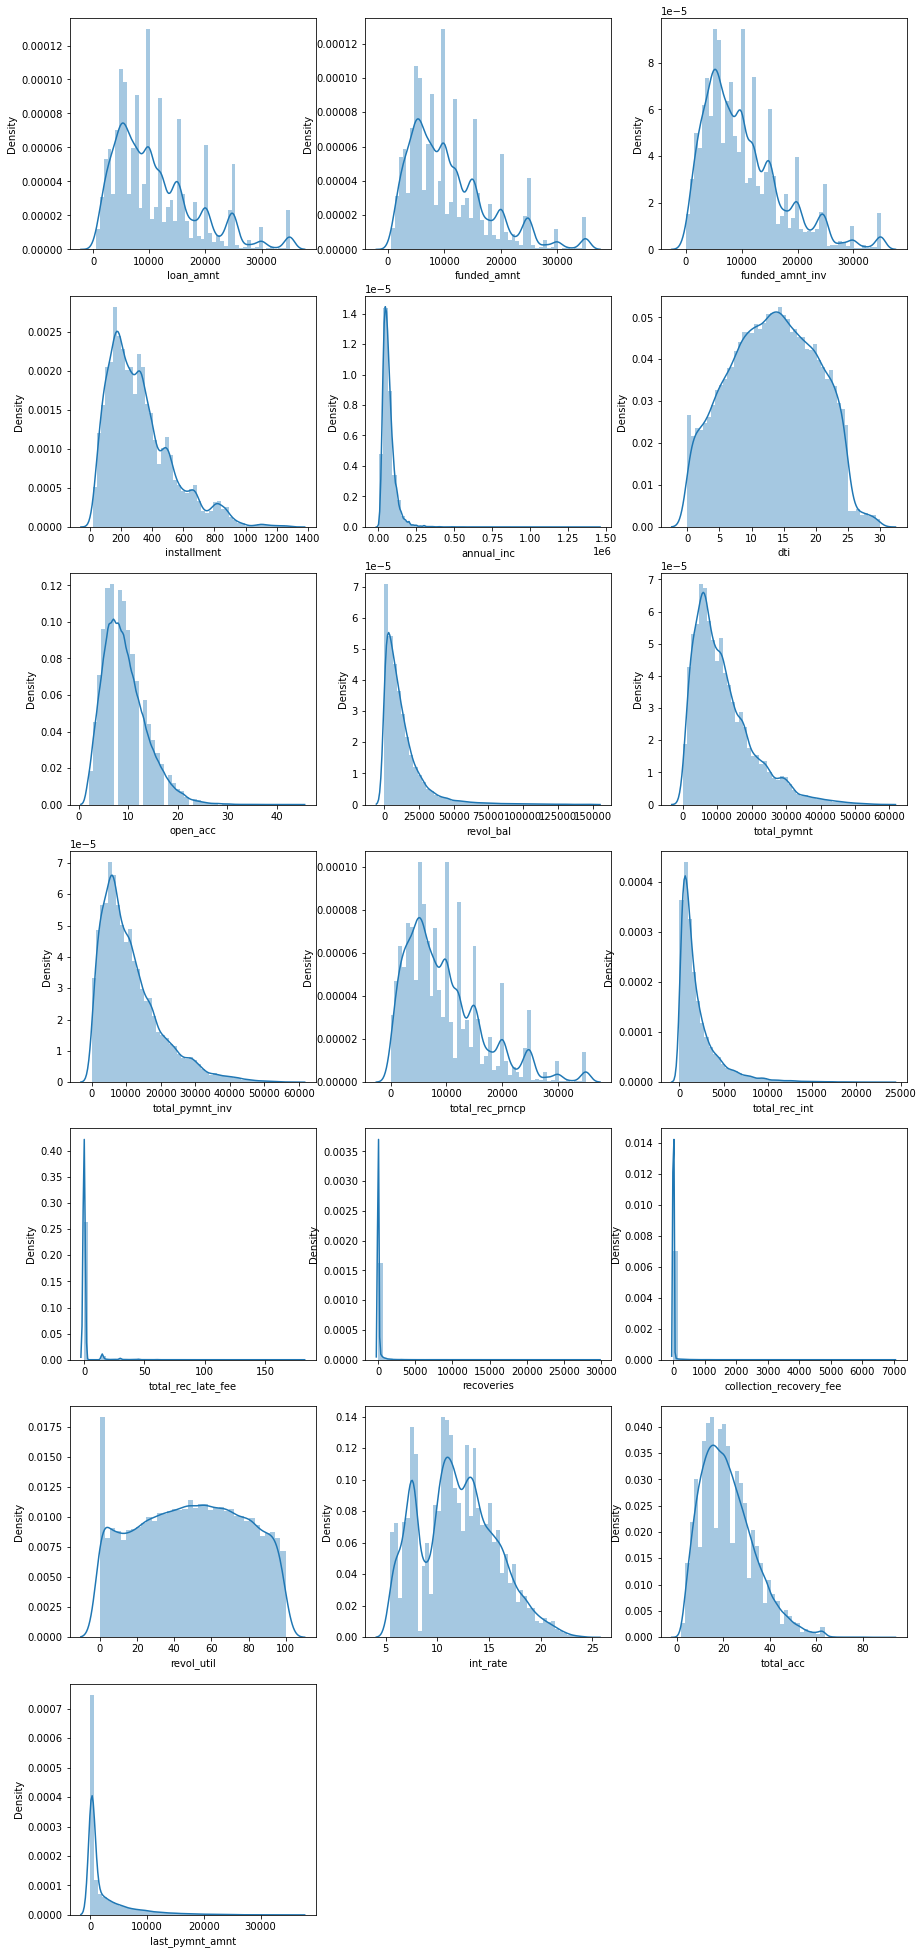

In [52]:
#dist plots for all the numeric columns
plt.figure(figsize=(15,40))
for i in range(len(num_columns)):
    plt.subplot(8,3, i + 1)
    sns.distplot(df1[num_columns[i]])
plt.show()

#### Analysis on the important Distribution plots from above

1. loan_amnt, funded_amnt, funded_amnt_inv is left skewed, Most of the values are present below the median.
2. Most of them have taken the installments between 200 and 400
3. Annual Income values of most of them are below 1 million.
4. dti column has most of its values between 10 and 20
5. Most of the Open credit lines for a person in this data are below 10
6. Median Total number of accounts maintained by a person in this data are around 20.

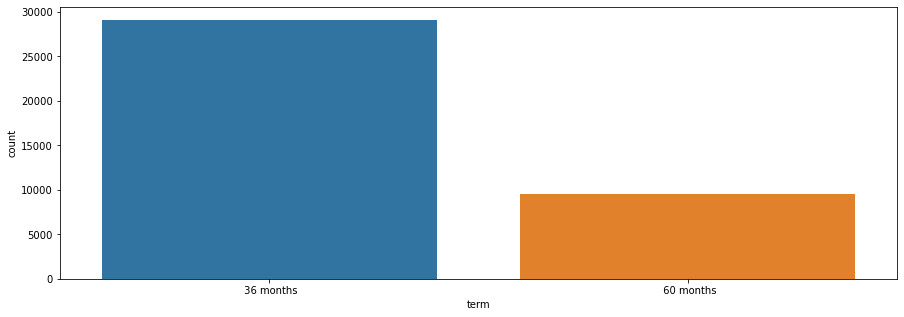

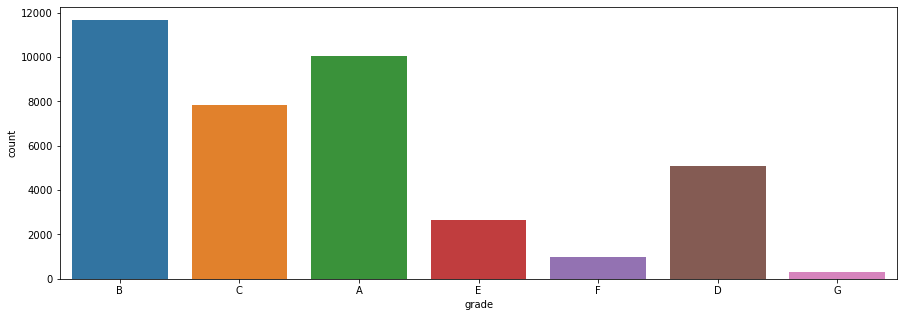

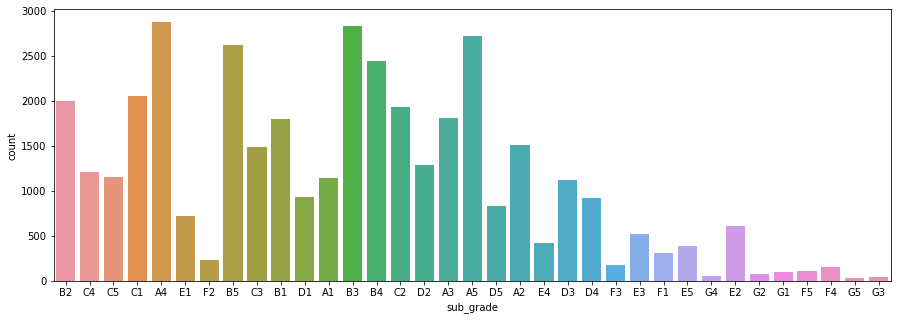

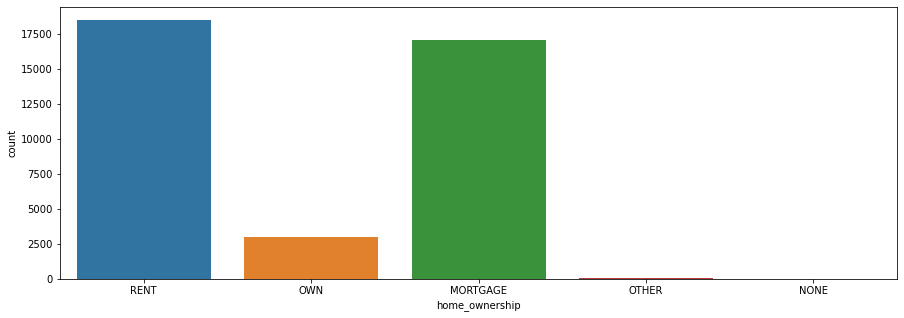

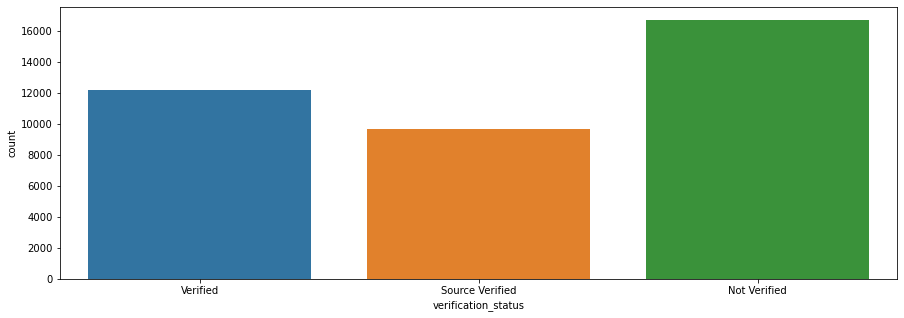

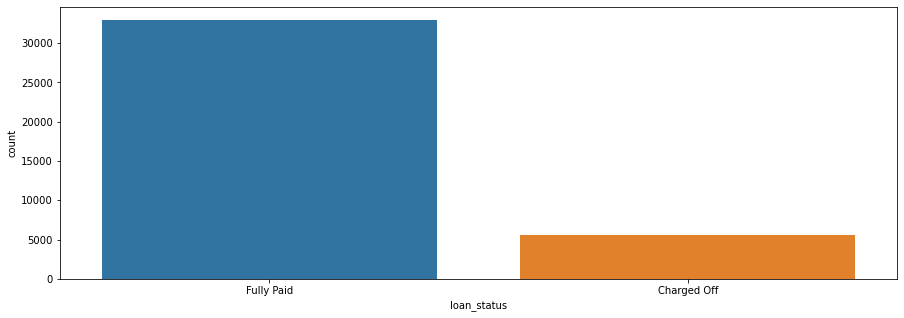

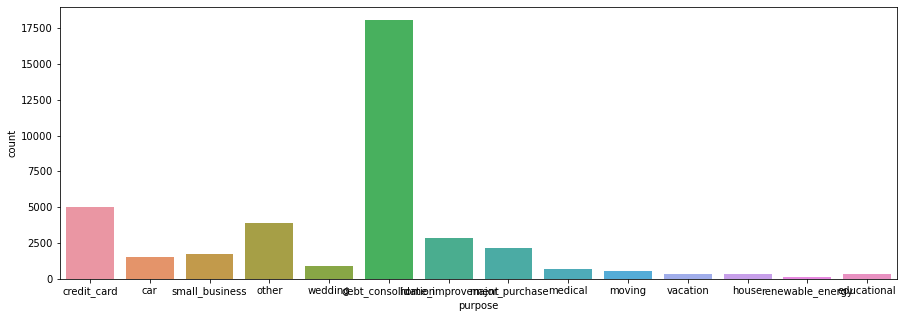

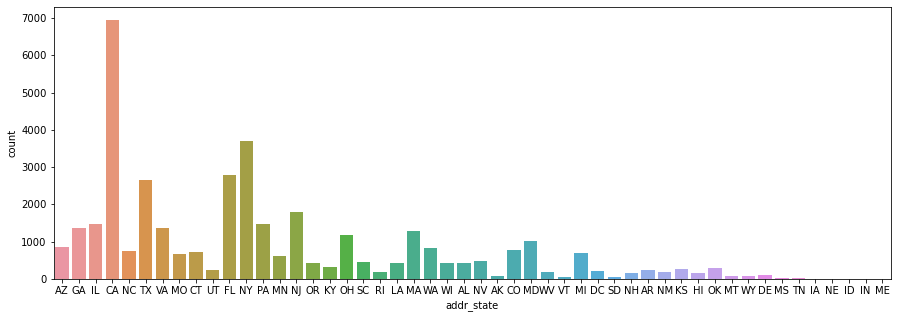

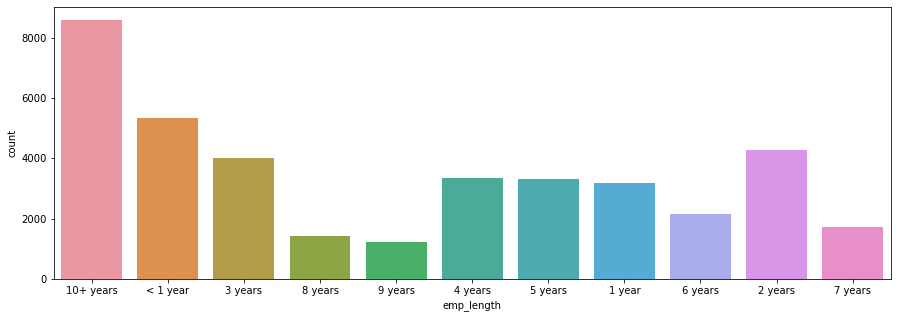

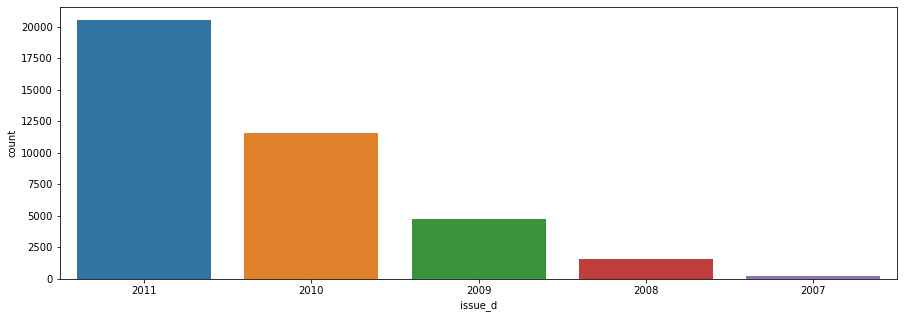

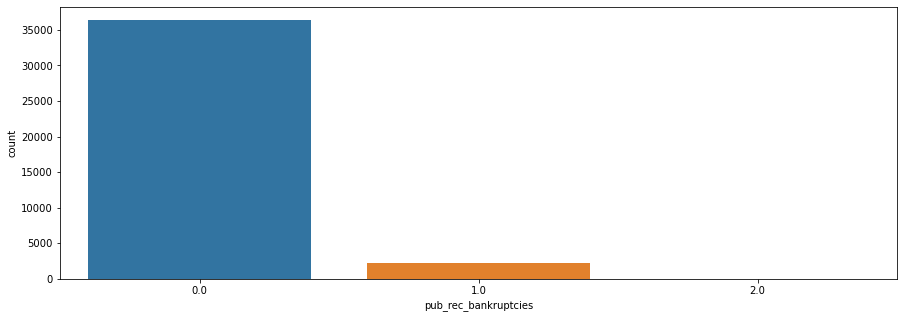

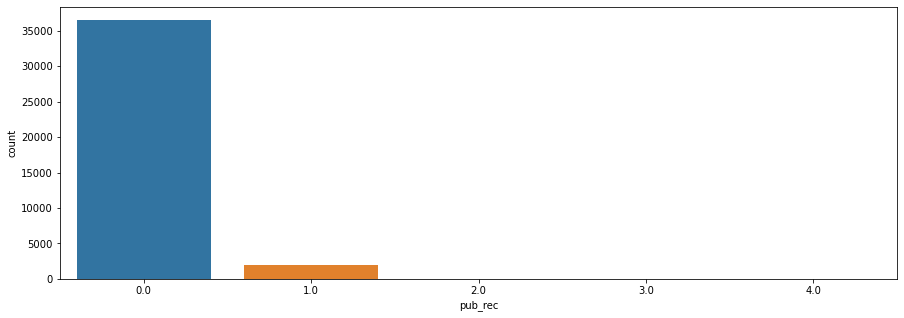

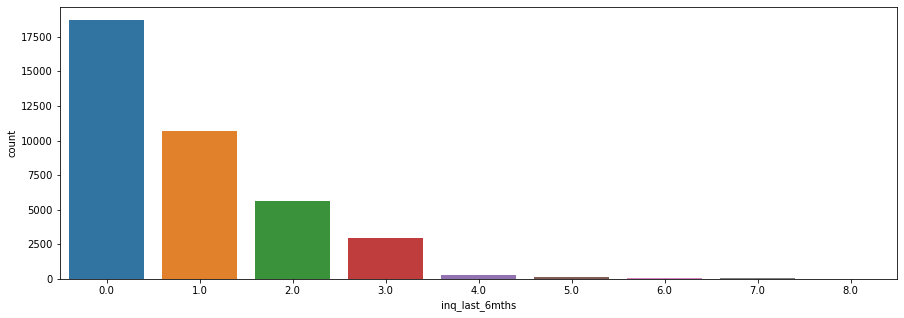

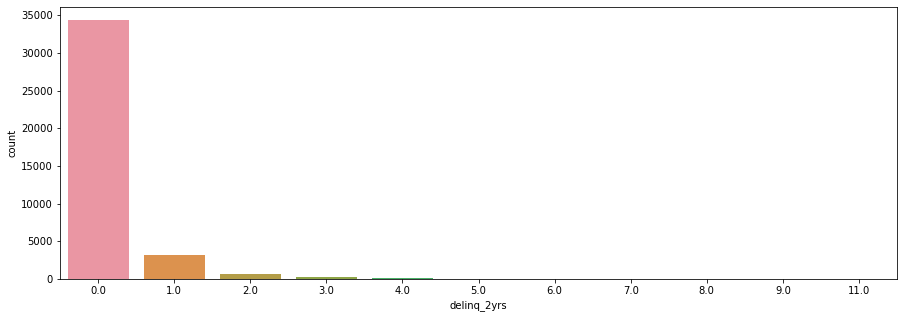

In [53]:
# Count plots for all the categorical columns
for col in categorical_col:
    plt.figure(figsize=(15,5))
    sns.countplot(df1[col])

#### Analysing the count points of the categorical variables

1. Most of the borrowers has 36 months term
2. Most of the borrowers has grade is B
3. Most of the borrowers has sub grade A4
4. Most of the borrowers RENT their houses
5. Most of the borrowers are NOT VERIFIED
6. Most of the borrowers are FULLY PAID
7. Most of the borrowers took loan for debt consolidation
8. Most of the borrowers are from California
9. Most of the borrowers are 10+ years of work experience
10. borrowers are increasing year by year from 2007 to 2011
11. Most of the borrowers has 0 public record bankruptcies 
12. Most of the borrowers has 0 derogatory public records
13. Most of the borrowers has 0 inq last 6 months
14. Most of the borrowers has 0 delinq_2yrs

## Bivariate Plots

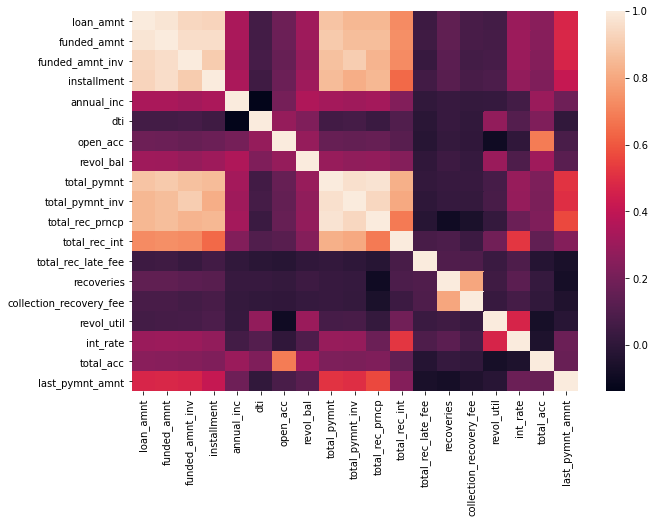

In [54]:
#plotting the correlation heat maps
plt.figure(figsize=(10,7))
sns.heatmap(df1[num_columns].corr())
plt.show()

Inference: There are some white patches on the heat map which refers those columns are closely related. Loan_amnt is closely related to funded amnt, funded amnt inv, installment, total paymnt, total_paymnt_inv, total_rec_prncp,total_rec_int as their correlation coefficient is nearer to 1

The pairplots are not plotted for correlation because it is not possible to analyze each graph and find the correlation as there are many numerical columns

### Plotting the numerical columns vs categorical columns in barplots

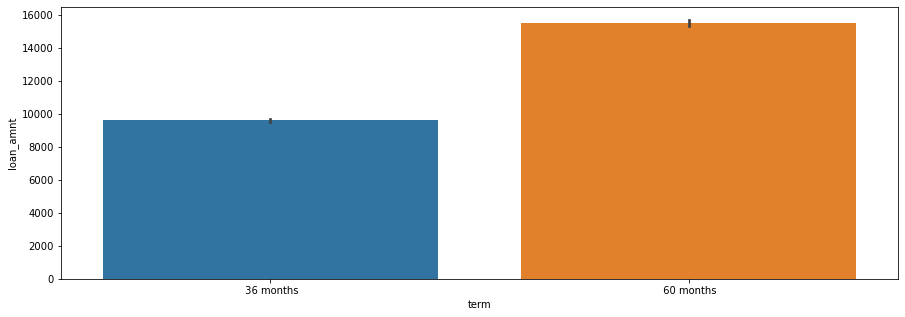

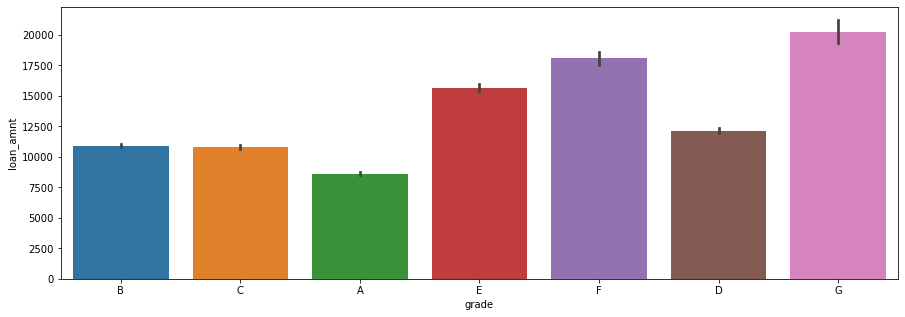

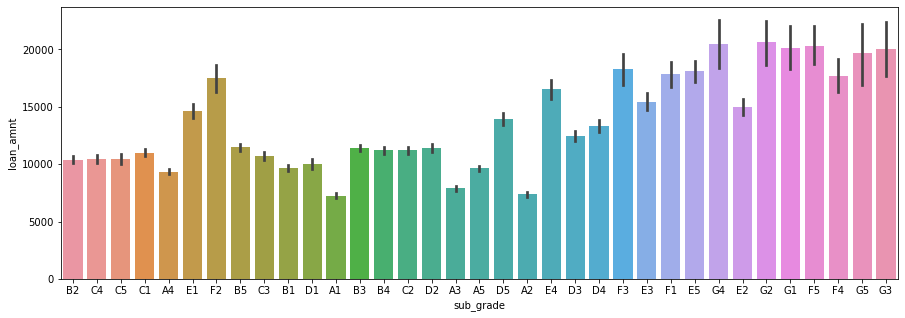

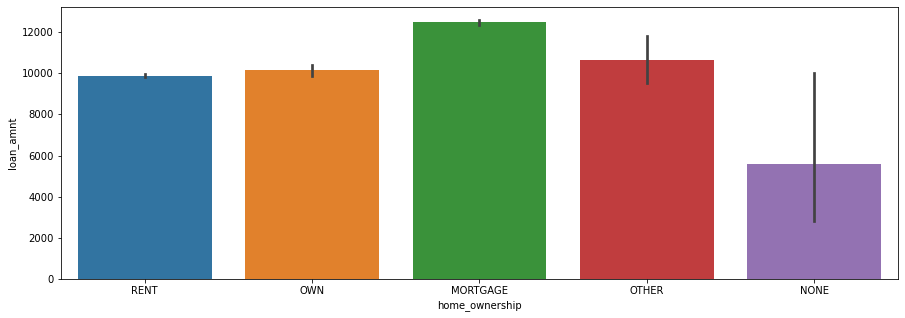

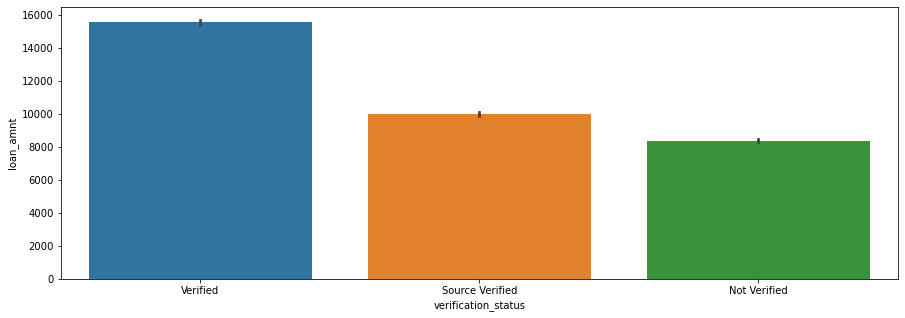

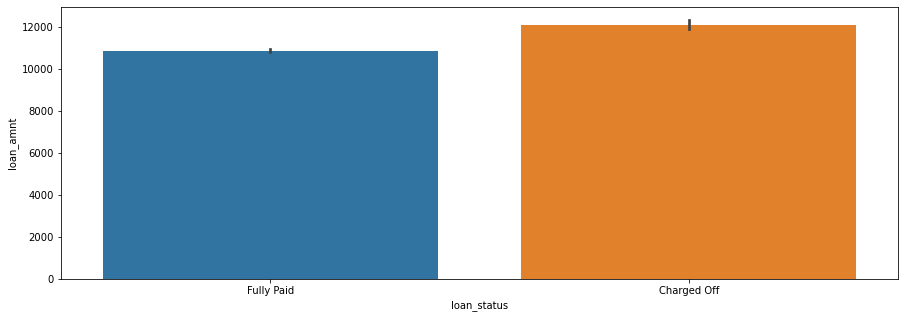

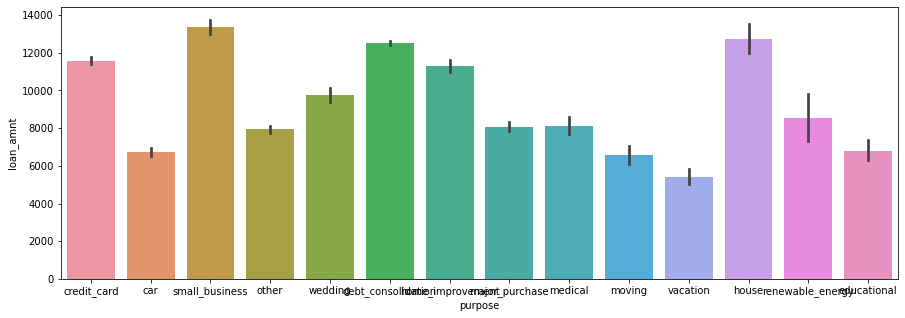

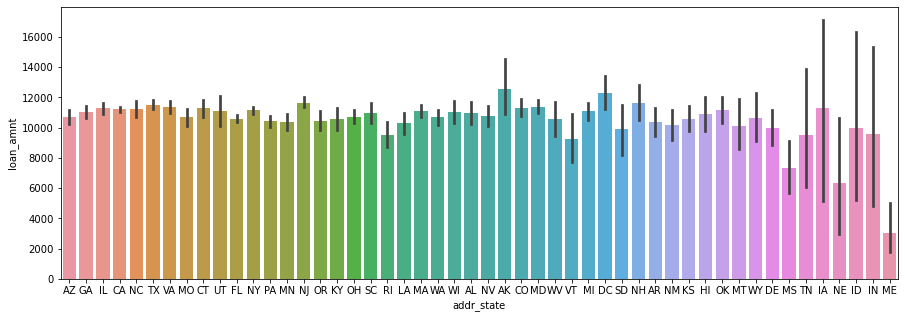

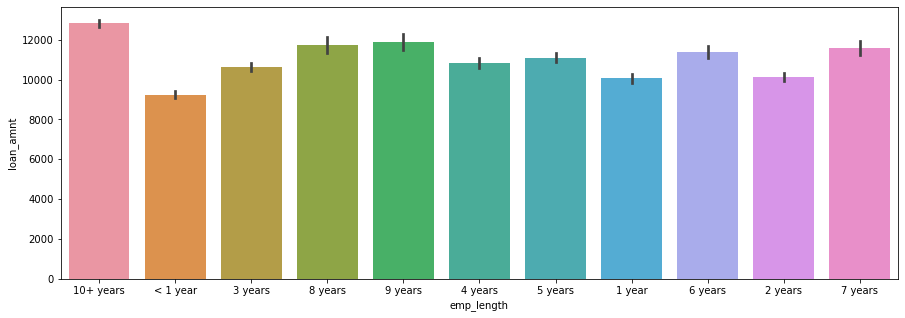

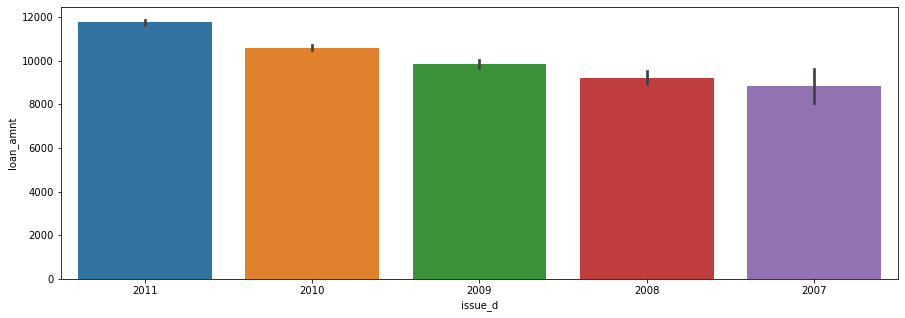

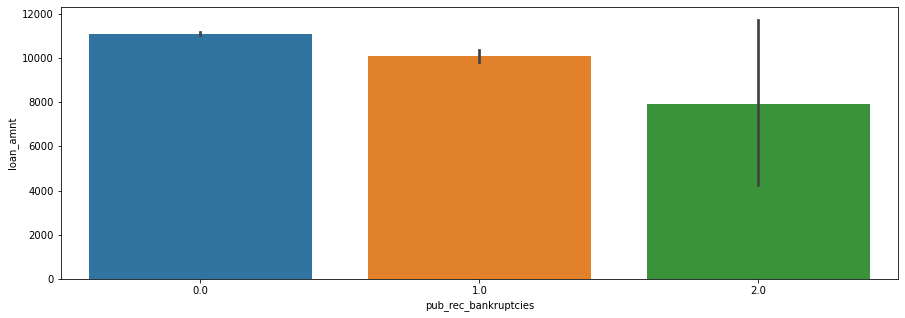

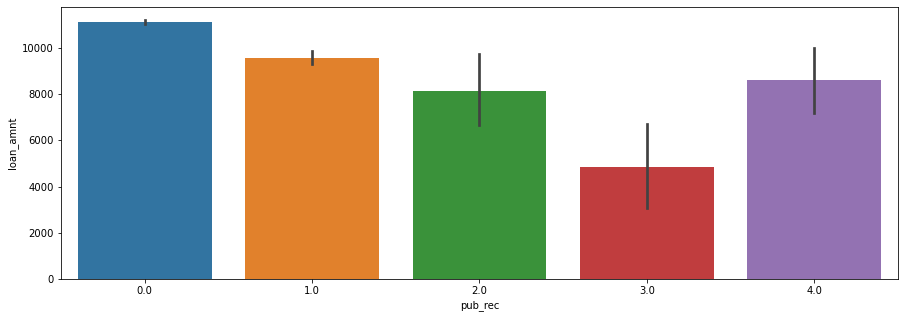

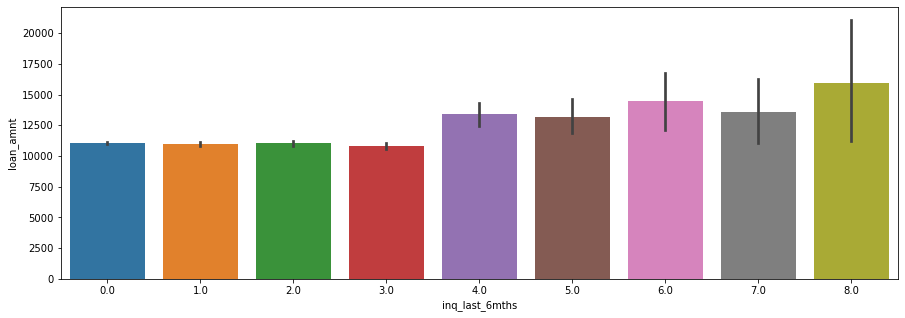

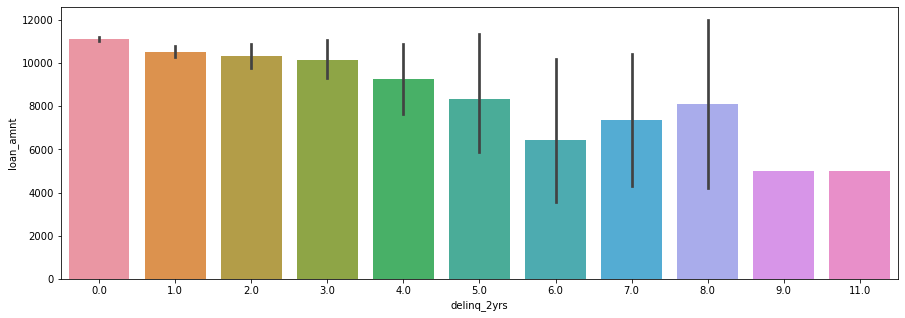

In [55]:
# Plotting loan amount column wrt to all the categorical columns to calculate means
for col in categorical_col:
    plt.figure(figsize=(15,5))
    sns.barplot(y=df1['loan_amnt'], x=df1[col], data=df1)
plt.show()   

### Important Inferences from above important graphs

1. Mean loan amount is higher for 60 months payment term, obvious that as amount increases the repayment time increases.
2. Mean loan amount is higher for people with G grade as value counts of G are less in number then there is a chance that mean might get increased
3. The borrowers with home ownership as MORTGAGE is likely to take more of loan amount
4. If the borrower is verified then high likely that the person may get more loan amount
5. More loan amounts are requested for small businesses
6. More loan amounts are requested by 10+ years experienced.
7. Loan amount requiements are increasing from 2007 to 2011
8. All the above points are similar for funded amount,funded_amt_inv, installments, annual income, total payment, total_pymnt_inv, total_rec_prncp and total_rec_int as they are directly related shown in the heatmap.

## Segmented Univariate Analysis.

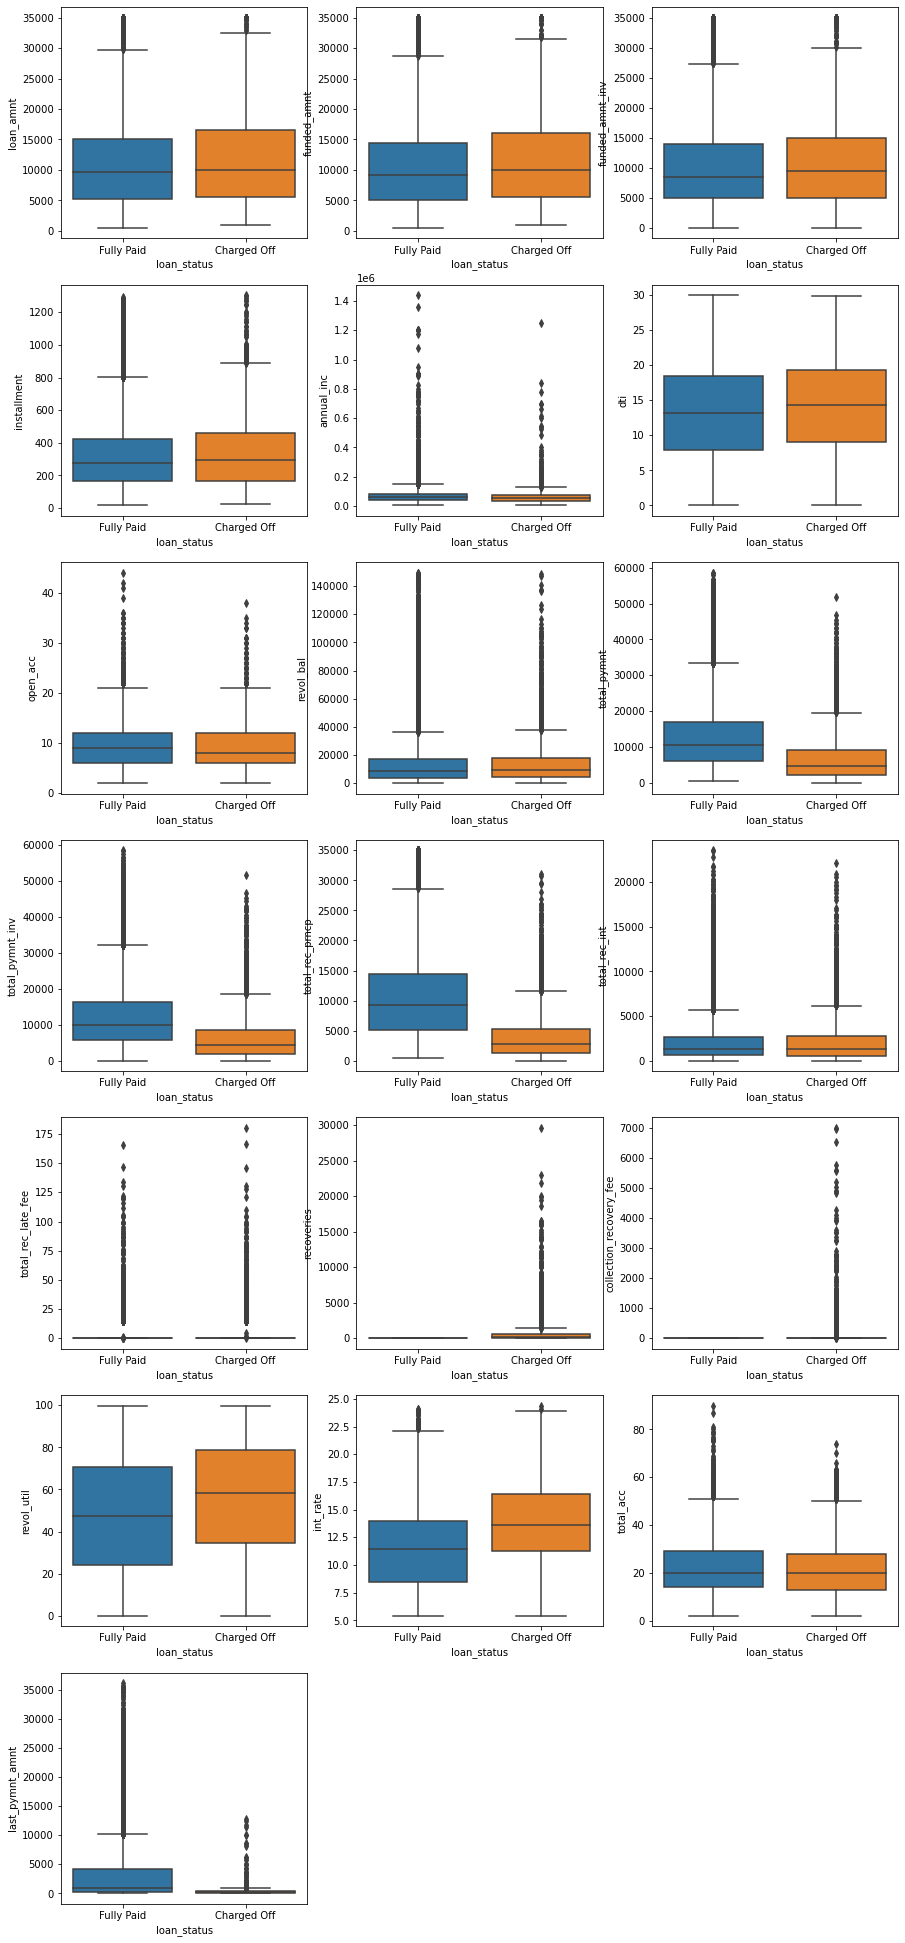

In [56]:
# Checking the numerical columns wrt loan_status as the we are required to predict the defaulter
plt.figure(figsize=(15,40))
for i in range(len(num_columns)):
    plt.subplot(8,3, i + 1)
    sns.boxplot(y=df1[num_columns[i]], x='loan_status', data=df1)
plt.show()

### Segmented the data with respect to Fully Paid and Charged Off and analyzing the box plots.

1. It is observed that most of the box plots are similar for both Fully Paid and Charged Off.
2. It is observed that if interest rate is higher then the borrower is more likely to be a defaulter
3. If the revol_util percentage (the amount of credit the borrower is using relative to all available revolving credit) is higher then there is high chance of being a defaulter
4. Total payment, total paymnent inv, total_rec_prncp, last payment amount are directly related and if they are less it is obviously a Charged off.

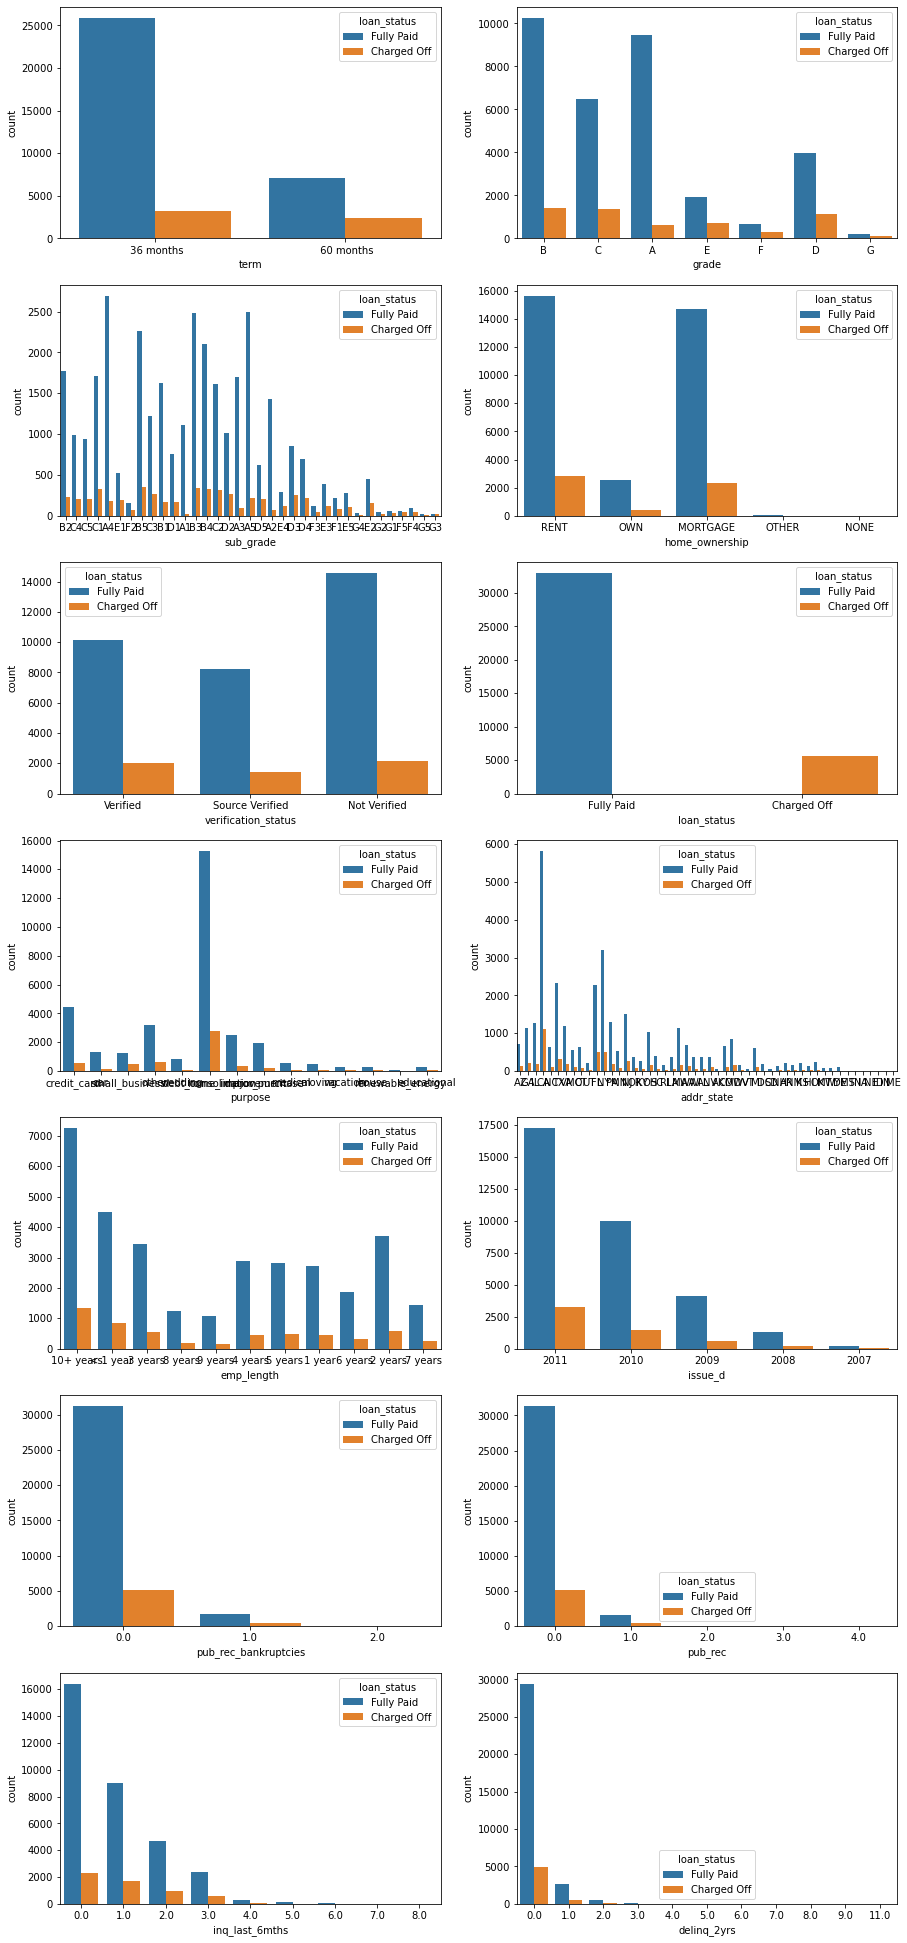

In [57]:
#Checking the categorical columns wrt loan_status as the we are required to predict the defaulter
plt.figure(figsize=(15,40))
for i in range(len(categorical_col)):
    plt.subplot(8,2, i + 1)
    sns.countplot(x=df1[categorical_col[i]], hue='loan_status', data=df1)
plt.show()

The above graphs provide us the data on how many values of each category are present in the categorical column with respect to loan status. The percentage likelihoods are calculated below and explained in detail.

#### Calculating percentage of defaulters based on the particular categorical columns

In [58]:
# defining the function per_check, it checks the percentage of defaulters grouped by the categorical columns and returns a pandas series
def per_check(cat):
    return (100*df1[df1['loan_status'] == 'Charged Off'].groupby(cat)['loan_status'].count()/df1.groupby(cat)['loan_status'].count())

In [59]:
#Checking if more percentage of defaulters took loan for 36 months or 60 months
print('Percentage of Defaulters in terms of loan taken in terms:\n',per_check('term').sort_values(ascending = False))

Percentage of Defaulters in terms of loan taken in terms:
 term
 60 months    25.316456
 36 months    11.092397
Name: loan_status, dtype: float64


In [60]:
#Checking the percentage of defaulters wrt grade
print('Percentage of Defaulters in each grade:\n',per_check('grade').sort_values(ascending = False))

Percentage of Defaulters in each grade:
 grade
G    33.779264
F    32.684426
E    26.849418
D    21.986234
C    17.200868
B    12.206613
A     5.993628
Name: loan_status, dtype: float64


In [61]:
#Checking the percentage of defaulters wrt sub_grade
print('Percentage of Defaulters in each sub grade:\n',per_check('sub_grade').sort_values(ascending = False))

Percentage of Defaulters in each sub grade:
 sub_grade
F5    47.787611
G3    42.222222
G2    36.363636
F4    35.099338
G5    34.482759
G1    32.978723
F2    30.042918
F1    29.836066
E4    29.716981
F3    29.310345
E5    28.165375
E1    27.423823
E2    26.547231
D5    25.059952
G4    24.074074
D4    23.420479
E3    23.062016
D3    22.939068
D2    21.073095
C3    18.145161
C5    18.039896
D1    17.937701
C4    17.578773
C2    16.632124
C1    16.358325
B5    13.613767
B4    13.500205
B3    12.075071
B2    11.394303
B1     9.515860
A5     7.992634
A4     6.195614
A3     5.693753
A2     4.907162
A1     2.633889
Name: loan_status, dtype: float64


In [62]:
#Checking the percentage of defaulters wrt home ownership
print('Percentage of Defaulters in each variety of home ownership:\n',per_check('home_ownership').sort_values(ascending = False))

Percentage of Defaulters in each variety of home ownership:
 home_ownership
OTHER       18.367347
RENT        15.364217
OWN         14.890756
MORTGAGE    13.673757
NONE              NaN
Name: loan_status, dtype: float64


In [63]:
#Checking the percentage of defaulters wrt verification status
print('Percentage of Defaulters in each type of verification status:\n',per_check('verification_status').sort_values(ascending = False))

Percentage of Defaulters in each type of verification status:
 verification_status
Verified           16.803212
Source Verified    14.821705
Not Verified       12.833263
Name: loan_status, dtype: float64


In [64]:
#Checking the percentage of defaulters wrt state in which the person is living
print('Percentage of Defaulters in each state:\n',per_check('addr_state').sort_values(ascending = False))

Percentage of Defaulters in each state:
 addr_state
NE    60.000000
NV    22.546973
SD    19.354839
AK    19.230769
FL    18.129496
MO    17.014925
HI    16.867470
ID    16.666667
NM    16.483516
OR    16.321839
CA    16.191710
UT    15.873016
MD    15.835777
GA    15.820456
NJ    15.530726
WA    15.525672
NC    15.200000
NH    15.060241
MI    14.630682
AZ    14.487633
KY    14.469453
SC    14.379085
WI    14.318182
OK    13.937282
NY    13.389235
MN    13.388430
IL    13.328823
MT    13.253012
OH    13.157895
CT    12.947658
VA    12.929145
RI    12.886598
CO    12.793734
AL    12.413793
LA    12.412178
PA    12.261580
MA    12.259059
WV    12.209302
KS    12.156863
TX    11.888638
TN    11.764706
AR    11.489362
VT    11.320755
DE    10.619469
MS    10.526316
DC     7.109005
WY     5.000000
IA          NaN
IN          NaN
ME          NaN
Name: loan_status, dtype: float64


In [65]:
#checking the value counts of states as we can see the percentage of defaulters from Nebraska is very high to check if there is sufficient data available to confirm that people from Nebraska are high likely to be defaulters.
df1['addr_state'].value_counts()

CA    6948
NY    3697
FL    2780
TX    2658
NJ    1790
IL    1478
PA    1468
VA    1369
GA    1359
MA    1297
OH    1178
MD    1023
AZ     849
WA     818
CO     766
NC     750
CT     726
MI     704
MO     670
MN     605
NV     479
SC     459
WI     440
AL     435
OR     435
LA     427
KY     311
OK     287
KS     255
UT     252
AR     235
DC     211
RI     194
NM     182
WV     172
NH     166
HI     166
DE     113
MT      83
WY      80
AK      78
SD      62
VT      53
MS      19
TN      17
IN       9
ID       6
NE       5
IA       5
ME       3
Name: addr_state, dtype: int64

In [66]:
#Checking the percentage of defaulters wrt the purpose of taking loan
print('Percentage of Defaulters in each purpose of taking loan:\n',per_check('purpose').sort_values(ascending = False))

Percentage of Defaulters in each purpose of taking loan:
 purpose
small_business        27.080958
renewable_energy      18.627451
educational           17.230769
other                 16.377749
house                 16.076294
moving                15.972222
medical               15.565345
debt_consolidation    15.327092
vacation              14.133333
home_improvement      12.077967
credit_card           10.783924
car                   10.673783
wedding               10.367171
major_purchase        10.325581
Name: loan_status, dtype: float64


In [67]:
#Checking the percentage of defaulters wrt the their experience
print('Percentage of Defaulters for each emp length:\n',per_check('emp_length').sort_values(ascending = False))

Percentage of Defaulters for each emp length:
 emp_length
10+ years    15.655919
< 1 year     15.615616
7 years      15.371128
5 years      14.515152
1 year       14.389397
6 years      14.160517
8 years      14.146341
3 years      13.836948
4 years      13.824057
2 years      13.213703
9 years      12.887439
Name: loan_status, dtype: float64


In [68]:
#Checking the percentage of defaulters wrt issued year
print('Percentage of Defaulters in each issued year:\n',per_check('issue_d'))

Percentage of Defaulters in each issued year:
 issue_d
2007    17.928287
2008    15.823190
2009    12.595420
2010    12.880562
2011    15.871314
Name: loan_status, dtype: float64


#### Plotting all the percentages of defaulters with respect to the categorical columns in bar graphs

Text(0, 0.5, 'Percentage Defaulters')

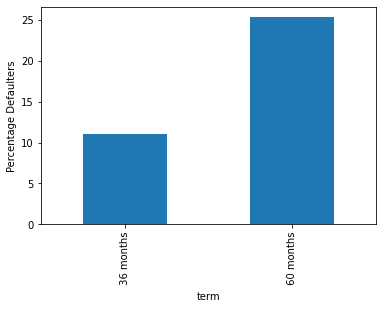

In [69]:
term_plot = per_check('term').plot.bar()
term_plot.set_ylabel('Percentage Defaulters')

Text(0, 0.5, 'Percentage Defaulters')

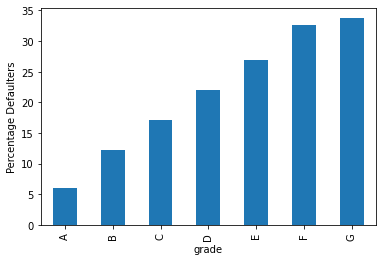

In [70]:
Grade_plot = per_check('grade').plot.bar()
Grade_plot.set_ylabel('Percentage Defaulters')

Text(0, 0.5, 'Percentage Defaulters')

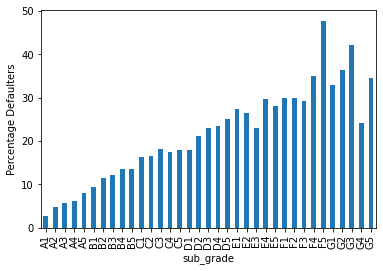

In [71]:
sub_plot = per_check('sub_grade').plot.bar()
sub_plot.set_ylabel('Percentage Defaulters')

Text(0, 0.5, 'Percentage Defaulters')

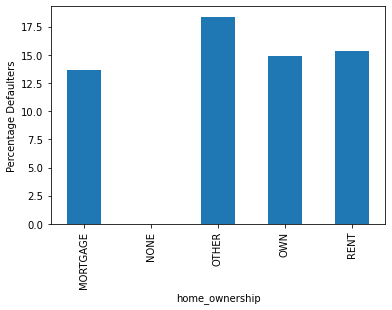

In [72]:
home_plot = per_check('home_ownership').plot.bar()
home_plot.set_ylabel('Percentage Defaulters')

Text(0, 0.5, 'Percentage Defaulters')

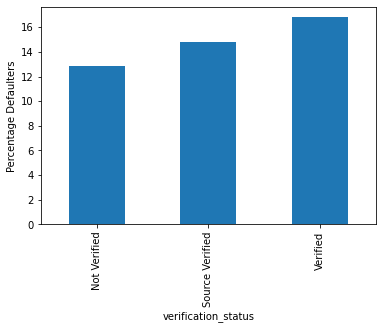

In [73]:
ver_plot = per_check('verification_status').plot.bar()
ver_plot.set_ylabel('Percentage Defaulters')

Text(0, 0.5, 'Percentage Defaulters')

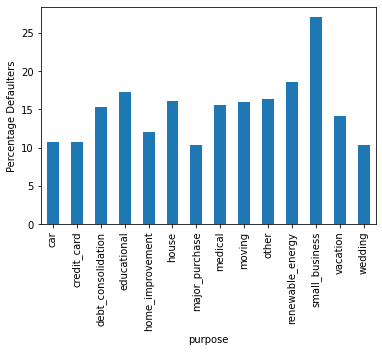

In [74]:
pur_plot = per_check('purpose').plot.bar()
pur_plot.set_ylabel('Percentage Defaulters')

Text(0, 0.5, 'Percentage Defaulters')

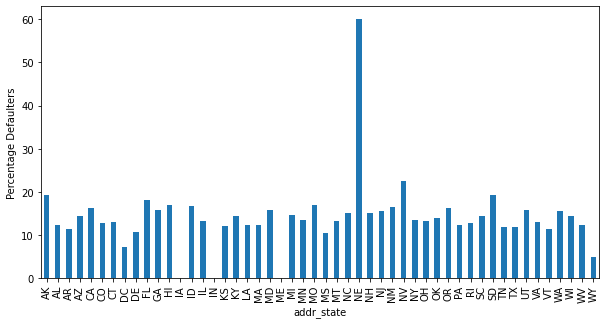

In [75]:
add_plot = per_check('addr_state').plot.bar(figsize = (10,5))
add_plot.set_ylabel('Percentage Defaulters')

Text(0, 0.5, 'Percentage Defaulters')

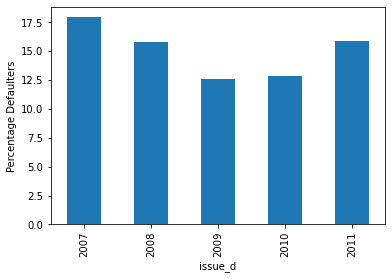

In [76]:
issd_plot = per_check('issue_d').plot.bar()
issd_plot.set_ylabel('Percentage Defaulters')

Text(0, 0.5, 'Percentage Defaulters')

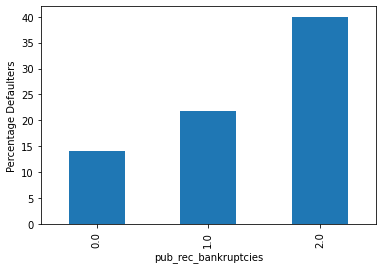

In [77]:
pub_plot = per_check('pub_rec_bankruptcies').plot.bar()
pub_plot.set_ylabel('Percentage Defaulters')

Text(0, 0.5, 'Percentage Defaulters')

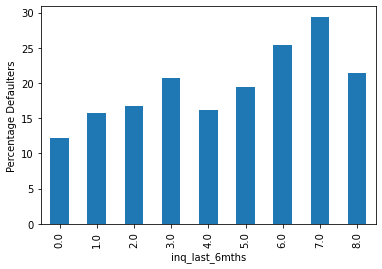

In [78]:
pub_plot = per_check('inq_last_6mths').plot.bar()
pub_plot.set_ylabel('Percentage Defaulters')

#### Inferences from the above percentage calculations and plots

1. The borrower who takes the loan for 60 months term are likely to default as we see there are more than 25% percent defaulters
2. The borrower with grades with D,E,F,G are more than 20% likely to default.
3. The borrower with sub grades with F5 and G3 are more than 40% likely to default
4. The borrower who has OTHER home ownership is 18.3% likely to default and rest has almost equal percentage of defaulters
5. The borrower whose verification status is verified is 16.8% likely to default and not verified are 12.8% likely to defaulter.
6. The borrower from Nebraska state has high likely to be a defaulter as per the percentage calculations but the people from     Nebraska are only 5 in number from the data set so we cannot conclude without enough number of data points comparable to the data set. But the borrower from Nevada is 22.5% likely to default.   
7. The borrower who takes loan for small business is 27% likely to default followed by other purposes.
8. Cannot infer much of the data from the work experience of the borrower as the percentage change is around 3% from max to min
9. The overall percentage defaulters reduced from 2007 to 2009 and then increased till 2011.
10. If The number of inquiries in past 6 months (excluding auto and mortgage inquiries) increases the chances of being a Defaulter is high
11. If Number of public record bankruptcies increases the chances of person being defaulter is high